## Convolutional Neural Network
   #### Computer Vision Winter Semester 2020/2021 by Clemens Spielvogel
    
In the following code example you will see how pretrained networks can be used to predict the class of new instances. For this purpose, we will use the VGG16 network architecture with pretrained weights from the ImageNet data set.
Like many other pretrained models, the model and its weights can be directly loaded via Keras (https://keras.io/api/applications/).

![title](Data/vgg.png)
![title](Data/vgg_2.png)

In [1]:
import os
import tensorflow as tf
from keras import Sequential, layers, regularizers
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
import cv2

print("Keras version", keras.__version__)
print("TF version", tf.__version__)

Keras version 2.3.1
TF version 2.1.0


Using TensorFlow backend.


In [2]:
# Seeding random number generators to obtain reproducible results
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)
tf.random.set_seed(seed_value) # tf.set_random_seed(seed_value) on older TF versions

In [3]:
# To display an image in jupyter, use PIL
from PIL import Image
from IPython.display import display

def display_array(array):
    if len(array.shape) > 2: # Check whether image is colored
        array = cv2.cvtColor(array.astype("uint8"), cv2.COLOR_BGR2RGB) # Swap BGR to RGB
    pil_img = Image.fromarray(array)
    display(pil_img)

In [4]:
# Loading the VGG16 model (default parameters)
model = VGG16(include_top=True,
              weights="imagenet",
              input_tensor=None,
              input_shape=None,
              pooling=None,
              classes=1000)

original


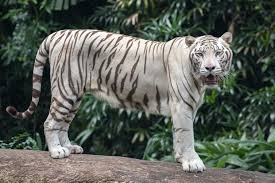

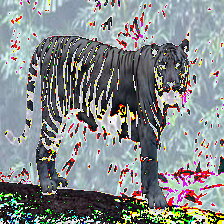

In [5]:
# Load an image to classify using VGG16
img = cv2.imread("Data/white_tiger.jpg", 1)

# Display original image
print("original")
display_array(img)

# Resize image to match the networks input size
img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_CUBIC)

# Convert image to RGB
img = cv2.cvtColor(img.astype("uint8"), cv2.COLOR_BGR2RGB)

# VGG16 preprocessing (subtracting the mean RGB value, computed on the training set, from each pixel)
img = preprocess_input(np.array([img]))

# Display preprocessed image
display_array(img[0])

In [6]:
# Classify the target image using VGG16
y_pred = model.predict(img)

# Show probabilities for each class
print(y_pred)

[[1.41609598e-06 6.74664591e-07 1.34042091e-06 3.04077571e-06
  4.49275177e-07 3.80229096e-07 1.00851958e-06 1.06529797e-05
  1.32948180e-05 3.75844866e-05 5.44980685e-06 1.79159406e-06
  4.47354687e-05 3.04918262e-06 4.06221488e-06 2.78575158e-06
  3.72396158e-07 6.64736217e-06 6.65667699e-07 1.53791450e-06
  8.83595646e-07 9.05371508e-06 6.99329394e-06 7.24710117e-05
  1.08956439e-04 1.73849742e-06 1.04992739e-06 7.18554816e-07
  1.30500200e-06 2.90557582e-05 5.87059094e-06 1.57986881e-06
  2.76208311e-06 2.98896884e-06 1.27497583e-06 1.01592377e-06
  5.91526350e-06 1.31303968e-05 2.79449159e-05 5.61731686e-05
  2.31295621e-06 2.11859206e-05 5.99447048e-07 6.21157642e-06
  3.48046001e-06 1.37940287e-05 8.13244151e-06 8.47901683e-05
  1.59129762e-04 2.98812665e-05 1.54790614e-05 4.27164079e-04
  3.63425272e-07 2.16807379e-07 1.34791628e-06 1.24668770e-06
  2.95291670e-07 8.15728583e-07 7.57672979e-07 3.50085116e-07
  1.24524161e-06 2.10915532e-05 4.78441416e-06 4.84194913e-07
  7.0266

In [7]:
# Associate probabilities with classes
potential_labels = decode_predictions(y_pred)

for label in potential_labels[0]:
    print(label[1], round(float(label[2]), 2))

tiger 0.68
tiger_cat 0.17
lion 0.03
jaguar 0.01
zebra 0.01
